# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [129]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
load_dotenv()
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient
%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Notebook3\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [130]:
# Read your api key environment variable
api_key = os.getenv("news_api")


In [131]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)


In [132]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_everything(
    q="Bitcoin",
    language="en",
    page_size=100,
    sort_by="relevancy"
)


In [133]:
# Fetch the Ethereum news articles
ether_headlines = newsapi.get_everything(
    q="Ethereum",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

In [134]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()



,date,text,compound,positive,negative,neutral
0,2022-06-03,New York lawmakers have passed a bill\r\n that...,-0.5574,0.000,0.098,0.902
1,2022-06-09,"Rapper and entrepreneur Shawn Carter, better k...",0.4404,0.077,0.000,0.923
2,2022-06-08,A new study on bitcoin calls into question whe...,0.5267,0.124,0.000,0.876
3,2022-06-05,"Image caption, President Faustin-Archange Toua...",0.5106,0.164,0.000,0.836
4,2022-06-02,You can now reportedly pay for your burritos a...,-0.1027,0.000,0.040,0.960


In [135]:
# Create the Ethereum sentiment scores DataFrame
ether_sentiments = []

for article in ether_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ether_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ether_df = pd.DataFrame(ether_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
ether_df = ether_df[cols]

ether_df.head()



,date,text,compound,positive,negative,neutral
0,2022-05-23,GameStop has officially thrown itself headlong...,-0.1027,0.000,0.040,0.960
1,2022-05-23,GameStop is going all-in on crypto. The video ...,0.1280,0.046,0.000,0.954
2,2022-06-07,The ability to conduct external transfers on P...,0.3182,0.059,0.000,0.941
3,2022-06-09,"A decentralized autonomous organization, or DA...",0.5859,0.134,0.000,0.866
4,2022-06-09,"Crypto Winter It May Be, But Ethereum Looks Li...",0.3612,0.081,0.044,0.875


In [136]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,-0.033550,0.060650,0.068910,0.870450
std,0.451947,0.062632,0.079504,0.087964
min,-0.948500,0.000000,0.000000,0.628000
25%,-0.381800,0.000000,0.000000,0.826000
50%,0.000000,0.060000,0.064000,0.875000
75%,0.318200,0.094500,0.101500,0.927500
max,0.817600,0.262000,0.372000,1.000000


In [137]:
# Describe the Ethereum Sentiment
ether_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.017831,0.072350,0.063070,0.864580
std,0.483854,0.076237,0.076434,0.094535
min,-0.948500,0.000000,0.000000,0.604000
25%,-0.394400,0.000000,0.000000,0.810500
50%,0.000000,0.058500,0.045000,0.875000
75%,0.406800,0.105500,0.098500,0.934250
max,0.916900,0.349000,0.372000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum

Q: Which coin had the highest compound score?

A: Ethereum

Q. Which coin had the highest positive score?

A: Ethereum

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [138]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [139]:
# Instantiate the lemmatizer
wnl = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
# YOUR CODE HERE!

In [140]:
# Complete the tokenizer function
def tokenizer(text):
      
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z]")
    clean = regex.sub(' ', text) 
    # Create a tokenized list of the words
    words = word_tokenize(clean)
    
    # Lemmatize words into root words
    result = [wnl.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    # Remove the stop words
    tokens = [word.lower() for word in result if word.lower() not in sw]
    
    return tokens

In [141]:
# Create a new tokens column for Bitcoin
bitcoin_df["Tokens"] = bitcoin_df.text.apply(tokenizer)
bitcoin_df.head()

,date,text,compound,positive,negative,neutral,Tokens
0,2022-06-03,New York lawmakers have passed a bill\r\n that...,-0.5574,0.000,0.098,0.902,"[new, york, lawmaker, passed, bill, would, tem..."
1,2022-06-09,"Rapper and entrepreneur Shawn Carter, better k...",0.4404,0.077,0.000,0.923,"[rapper, entrepreneur, shawn, carter, better, ..."
2,2022-06-08,A new study on bitcoin calls into question whe...,0.5267,0.124,0.000,0.876,"[new, study, bitcoin, call, question, whether,..."
3,2022-06-05,"Image caption, President Faustin-Archange Toua...",0.5106,0.164,0.000,0.836,"[image, caption, president, faustin, archange,..."
4,2022-06-02,You can now reportedly pay for your burritos a...,-0.1027,0.000,0.040,0.960,"[reportedly, pay, burrito, taco, bitcoin, digi..."


In [142]:
# Create a new tokens column for Ethereum
ether_df["Tokens"] = ether_df.text.apply(tokenizer)
ether_df.head()

,date,text,compound,positive,negative,neutral,Tokens
0,2022-05-23,GameStop has officially thrown itself headlong...,-0.1027,0.000,0.040,0.960,"[gamestop, ha, officially, thrown, headlong, w..."
1,2022-05-23,GameStop is going all-in on crypto. The video ...,0.1280,0.046,0.000,0.954,"[gamestop, going, crypto, video, game, retaile..."
2,2022-06-07,The ability to conduct external transfers on P...,0.3182,0.059,0.000,0.941,"[ability, conduct, external, transfer, paypal,..."
3,2022-06-09,"A decentralized autonomous organization, or DA...",0.5859,0.134,0.000,0.866,"[decentralized, autonomous, organization, dao,..."
4,2022-06-09,"Crypto Winter It May Be, But Ethereum Looks Li...",0.3612,0.081,0.044,0.875,"[crypto, winter, may, ethereum, looks, like, b..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [143]:
from collections import Counter
from nltk import ngrams

In [144]:
# Generate the Bitcoin N-grams where N=2
N = 2
grams = ngrams(tokenizer(bitcoin_df.text.str.cat()), N)
Counter(grams).most_common(15)

[(('may', 'reuters'), 26),
 (('new', 'york'), 8),
 (('june', 'reuters'), 7),
 (('digital', 'currency'), 6),
 (('char', 'may'), 6),
 (('char', 'posted'), 5),
 (('char', 'june'), 5),
 (('hong', 'kong'), 4),
 (('record', 'losing'), 4),
 (('losing', 'streak'), 4),
 (('called', 'stablecoin'), 4),
 (('crypto', 'asset'), 4),
 (('char', 'london'), 4),
 (('cryptocurrency', 'market'), 4),
 (('crypto', 'market'), 4)]

In [145]:
# Generate the Ethereum N-grams where N=2
N = 2
grams = ngrams(tokenizer(ether_df.text.str.cat()), N)
Counter(grams).most_common(15)

[(('ethereum', 'eth'), 9),
 (('crypto', 'market'), 7),
 (('cryptocurrency', 'market'), 6),
 (('char', 'happened'), 6),
 (('crypto', 'winter'), 5),
 (('may', 'reuters'), 5),
 (('last', 'week'), 5),
 (('char', 'crypto'), 4),
 (('char', 'cryptocurrency'), 4),
 (('eth', 'ha'), 4),
 (('price', 'ethereum'), 3),
 (('char', 'new'), 3),
 (('new', 'york'), 3),
 (('char', 'may'), 3),
 (('world', 'biggest'), 3)]

In [146]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [147]:
# Use token_count to get the top 10 words for Bitcoin
btc_tokens= tokenizer(bitcoin_df.text.str.cat())
token_count(btc_tokens, N=10)

[('char', 96),
 ('bitcoin', 50),
 ('reuters', 36),
 ('crypto', 32),
 ('cryptocurrency', 30),
 ('may', 29),
 ('ha', 28),
 ('market', 21),
 ('week', 19),
 ('new', 18)]

In [148]:
# Use token_count to get the top 10 words for Ethereum
ether_tokens= tokenizer(ether_df.text.str.cat())
token_count(ether_tokens, N=10)

[('char', 99),
 ('crypto', 46),
 ('ha', 33),
 ('cryptocurrency', 29),
 ('market', 24),
 ('ethereum', 20),
 ('bitcoin', 19),
 ('wa', 17),
 ('world', 15),
 ('token', 13)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [149]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [150]:
# Generate the Bitcoin word cloud
def wordcloud(text, title=""):
    df_cloud = WordCloud(width=500, colormap='RdYlBu').generate(text)
    plt.imshow(df_cloud)
    plt.axis("off")
    fontdict = {"fontsize": 48, "fontweight" : "bold"}
    plt.title(title, fontdict=fontdict)
    plt.show()

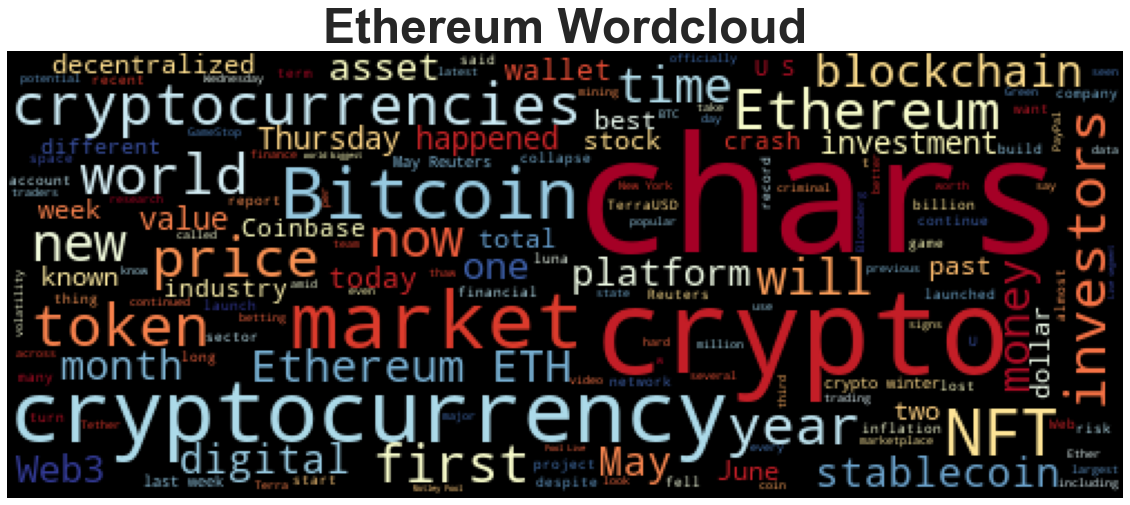

In [151]:
# Generate the Ethereum word cloud
wordcloud(ether_df.text.str.cat(), title='Ethereum Wordcloud')

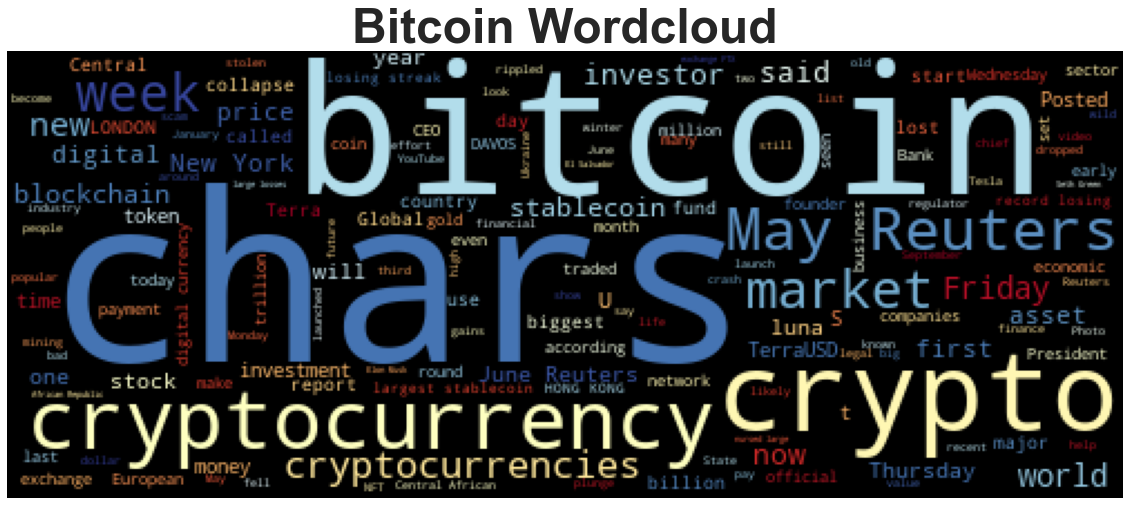

In [152]:
# Generate the Bitcoin word cloud
wordcloud(bitcoin_df.text.str.cat(), title='Bitcoin Wordcloud')

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [153]:
import spacy
from spacy import displacy

In [154]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [155]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [156]:
# Concatenate all of the Bitcoin text together
bct_text = ' '.join(bitcoin_df.text)
bct_text

'New York lawmakers have passed a bill\r\n that would temporarily ban new bitcoin\r\n mining operations. Early on Friday, state senators voted 36-27 to pass the legislation. It\'s now bound for the desk of… [+2036 chars] Rapper and entrepreneur Shawn Carter, better known as Jay-Z, is bringing Bitcoin to the place where he grew up. On Thursday, Jay-Z and former Twitter CEO Jack Dorsey announced the launch of Bitcoin A… [+2920 chars] A new study on bitcoin calls into question whether the digital currency is truly as decentralized and anonymous as its biggest devotees would have you believe. \r\n Researchers from Baylor, Rice, and t… [+7343 chars] Image caption, President Faustin-Archange Touadéra wants to rethink his country\'s economic philosophy\r\nThe Central African Republic\'s decision to adopt Bitcoin as legal tender came as a surprise to m… [+8881 chars] You can now reportedly pay for your burritos and tacos with Bitcoin and other digital currencies, in case you don\'t mind spendi

In [157]:
# Run the NER processor on all of the text
bct_doc = nlp(bct_text)


# Add a title to the document
bct_doc.user_data["title"] = "Bitcoin NER"

In [158]:
# Render the visualization
displacy.render(bct_doc, style='ent')

In [159]:
# List all Entities
for ent in bct_doc.ents:
    print(ent.text + ' ' + ent.label_)

New York GPE
Friday DATE
36-27 CARDINAL
Rapper NORP
Shawn Carter PERSON
Jay-Z PERSON
Thursday DATE
Jay-Z PERSON
Jack Dorsey PERSON
Faustin-Archange Touadéra LAW
The Central African Republic's ORG
Bitcoin NORP
first ORDINAL
nearly three feet QUANTITY
] Photo Illustration WORK_OF_ART
Grayson Blackmon PERSON
Oliyarnyk / CC-BY-SA-4.0 ORG
Michael Chobanian PERSON
the Blockchain Association of Ukraine ORG
Bitcoin ORG
Gucci handbag PERSON
week DATE
Kristy Kilburn PERSON
May 11 DATE
Reuters ORG
7.23% PERCENT
28,758.29 MONEY
GMT WORK_OF_ART
Wednesday DATE
2,241.68 MONEY
40.4% PERCENT
Reuters ORG
5.2% PERCENT
31,441.76 MONEY
GMT WORK_OF_ART
Monday DATE
1,552.78 MONEY
34.8% PERCENT
year DATE
Mexican NORP
North London LOC
a few weeks ago DATE
+2779 PERSON
May 24 DATE
Reuters ORG
its ninth week DATE
today DATE
Seth Green's PERSON
NFT ORG
two CARDINAL
Seth Green's PERSON
Nike ORG
Seth Green's PERSON
NFT ORG
Sam Bankman-Fried PERSON
the digital asset exchange ORG
FTX ORG
Riot Blockchain PERSON
Marath

---

### Ethereum NER

In [160]:
# Concatenate all of the Ethereum text together
eth_text = ' '.join(ether_df.text)
eth_text

'GameStop has officially thrown itself headlong into the web3 vipers nest with a new app release, though its hard to say whether its proposed population of gamers and game developers will take up the … [+3255 chars] GameStop is going all-in on crypto. The video game retailer launched\xa0its own self-custodial Ethereum digital wallet, it said Monday. The wallet will be accessible through a Google Chrome extension an… [+1491 chars] The ability to conduct external transfers on PayPal\'s crypto platform, an image of which can be seen below, will start rolling out to users today and be available to everyone in the U.S. in the next … [+687 chars] A decentralized autonomous organization, or DAO, is giving away two seats on a Blue Origin flight to space.\r\nThis is likely the first time non-fungible tokens, or NFTs, have played a role in minting … [+4509 chars] Crypto Winter It May Be, But Ethereum Looks Like A Buy \r\nThe Winklevoss twins are cutting the staff at Gemini and say crypto winter 

In [161]:
# Run the NER processor on all of the text
eth_doc = nlp(eth_text)

# Add a title to the document
eth_doc.user_data["title"] = "Ethereum NER"

In [162]:
# Render the visualization
displacy.render(eth_doc, style='ent')

In [163]:
# List all Entities
for ent in eth_doc.ents:
    print(ent.text + ' ' + ent.label_)

GameStop ORG
web3 LOC
Ethereum ORG
Monday DATE
Google Chrome PRODUCT
PayPal ORG
today DATE
U.S. GPE
DAO ORG
two CARDINAL
Blue Origin ORG
first ORDINAL
Gemini ORG
Ethereum (Cryptocurrency ORG
+3614 NORP
New York GPE
Friday DATE
36-27 CARDINAL
Switzerland GPE
May 25 DATE
Reuters ORG
Gavin Wood PERSON
Nvidia PERSON
Ampere Lite Hash Rate WORK_OF_ART
LHR ORG
Ethereum ORG
May 11 DATE
Reuters ORG
7.23% PERCENT
28,758.29 MONEY
GMT WORK_OF_ART
Wednesday DATE
2,241.68 MONEY
40.4% PERCENT
Reuters ORG
5.2% PERCENT
31,441.76 MONEY
GMT WORK_OF_ART
Monday DATE
1,552.78 MONEY
34.8% PERCENT
year DATE
Buterin PERSON
AI ORG
Eliezer Yudkowsky PERSON
YouTube ORG
Elon Musk PERSON
YouTube ORG
the past few years DATE
NFT ORG
$29 billion MONEY
several years ago DATE
Kim Kardashian PERSON
Floyd Mayweather PERSON
NBA ORG
Paul Pierce PERSON
Ether PERSON
NFT ORG
NFT ORG
Solana PERSON
third ORDINAL
10% PERCENT
Wednesday DATE
the past few years DATE
NFT ORG
$29 billion MONEY
6 CARDINAL
6 CARDINAL
New York's GPE
Ukra

---